In [200]:
# 导包
# (1) 数据处理
import pandas as pd
import numpy as np

# (2) 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

# (3) 特征工程
# 数据集划分
from sklearn.model_selection import train_test_split
# 标准化
from sklearn.preprocessing import StandardScaler

# (4) 模型导入与评估
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [201]:
df = pd.read_csv('./data/cancer patient data sets.csv')
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


|            标签            |      说明      |
|:------------------------:|:------------:|
|           Age            |     患者年龄     |
|          Gender          |     患者性别     |
|      Air Pollution       | 患者所居住的空气污染情况 |
|       Alcohol use        |     饮酒程度     |
|       Dust Allergy       |    粉尘过敏程度    |
|   OccuPational Hazards   |    职业危害情况    |
|       Genetic Risk       |    遗传风险情况    |
|   chronic Lung Disease   |    慢性肺病情况    |
|      Balanced Diet       |    均衡饮食情况    |
|         Obesity          |     肥胖情况     |
|         Smoking          |     吸烟情况     |
|      Passive Smoker      |   被动吸烟者情况    |
|        Chest Pain        |     胸痛情况     |
|    Coughing of Blood     |     咳血情况     |
|         Fatigue          |     疲劳情况     |
|       Weight Loss        |    体重减轻情况    |
|   Shortness of Breath    |      气短      |
|         Wheezing         |      喘息      |
|  Swallowing Difficulty   |     吞咽困难     |
| Clubbing of Finger Nails |     杵状指      |
|      Frequent Cold       |     经常感冒     |
|        Dry Cough         |     干咳情况     |
|         Snoring          |     打鼾情况     |
|          Level           |    肺癌严重性     |


In [202]:
df.shape

(1000, 26)

In [203]:
# 删除无用的数据 index 、Patient Id
df.drop(columns=['index', 'Patient Id'], inplace=True)
df.columns

Index(['Age', 'Gender', 'Air Pollution', 'Alcohol use', 'Dust Allergy',
       'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease',
       'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain',
       'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath',
       'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails',
       'Frequent Cold', 'Dry Cough', 'Snoring', 'Level'],
      dtype='object')

In [204]:
# 检查缺失值
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [205]:
# 目标值分析
target = df['Level'].unique()
df['Level'].value_counts()

Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

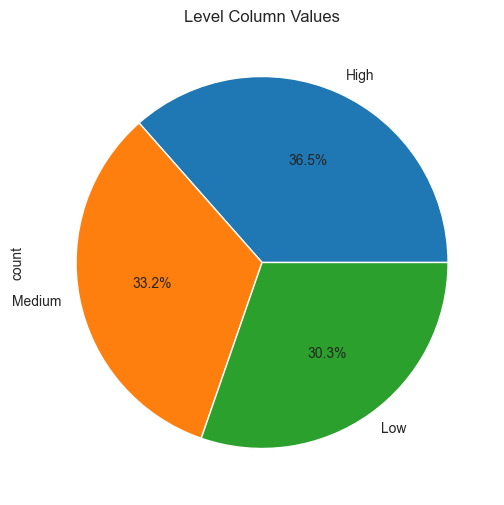

In [206]:
# 绘制目标值数据的饼图
plt.figure(figsize=(6,7))
plt.title('Level Column Values')
round(df['Level'].value_counts() / df.shape[0]*100,2).plot.pie(autopct='%2.1f%%')
plt.show()

In [207]:
# 离散数据转换为连续型
df['Level'] = df['Level'].replace(['Low','Medium','High'],[0,1,2])

C:\Users\17531\AppData\Local\Temp\ipykernel_20308\3232633253.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Level'] = df['Level'].replace(['Low','Medium','High'],[0,1,2])


In [208]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


<Axes: >

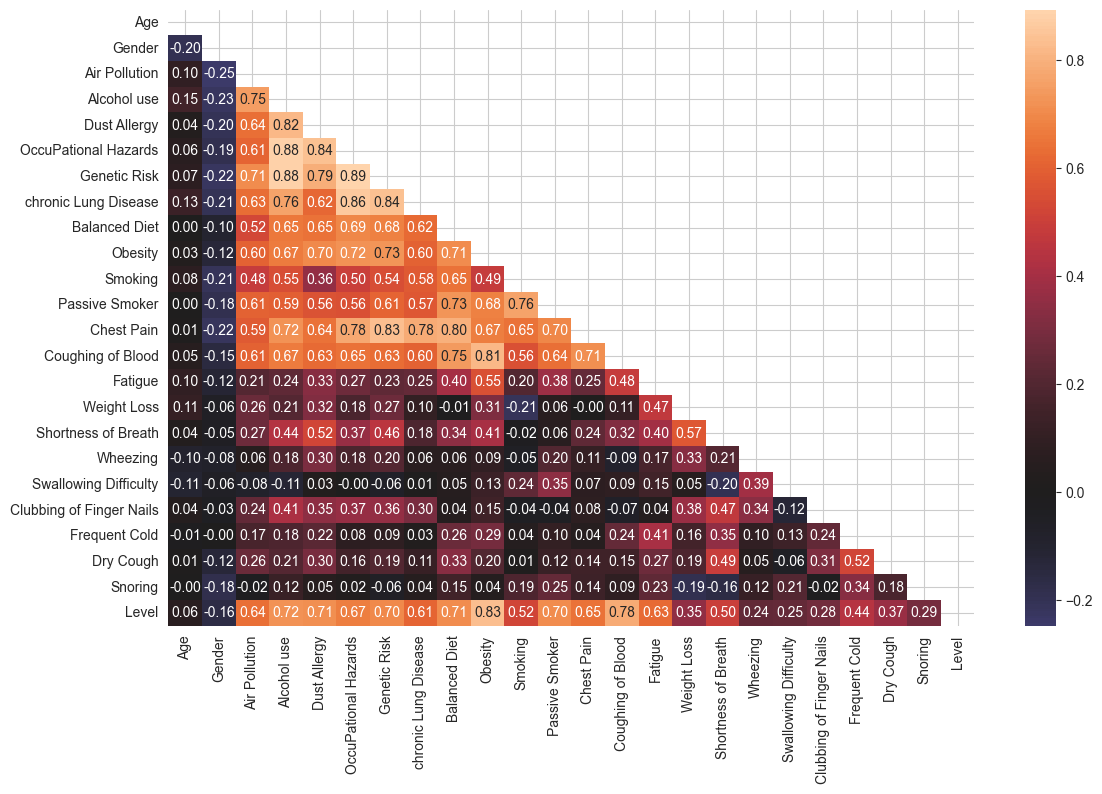

In [209]:
# 绘制相关性热力图
plt.figure(figsize=(13, 8))
_df = df.copy()
# 计算特征之间的相关系数
correlation = _df.corr()
# 矩阵变换
mask = np.triu(np.ones_like(correlation,dtype=bool))
# 绘制相关性系数的热力图
sns.heatmap(correlation, annot=True, mask=mask, fmt='.2f', center=0)

> 由热力图分析可得：
> - 肺癌症状程度与：饮酒程度、粉尘过敏、家族遗传性、饮食均衡情况、肥胖、二次吸烟、咳血程度具有高度的线性相关性
> - 肺癌症状程度与：空气污染程度、职业危害程度、慢性肺病、吸烟程度、胸痛程度、疲劳程度、气喘程度、经常感冒具有显著的相关性

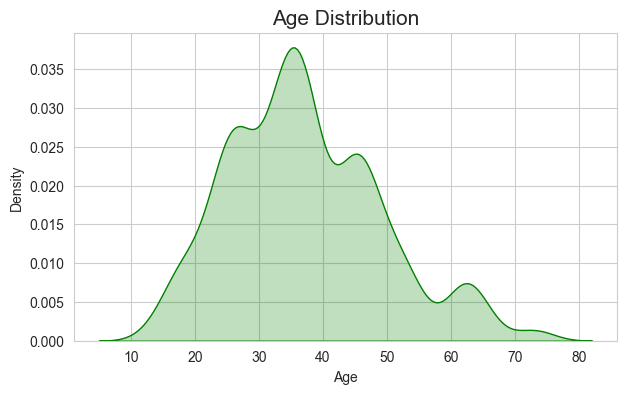

In [210]:
# 年龄分析
plt.figure(figsize=(7,4))
sns.kdeplot(df['Age'], fill=True, color="g")
plt.title("Age Distribution", fontsize=15)
plt.show()

In [211]:
# 标签划分 ==> 不同的值，赋予不同水平的含义
labels = {
    0: "extremely low",
    1: "very low",
    2: "low",
    3: "below medium average",
    4: "medium",
    5: "above medium average",
    6: "high",
    7: "very high",
    8: "extremely high",
    9: "Maximum"
}

[Text(0.5, 1.0, 'The relationship between gender and occupational hazard')]

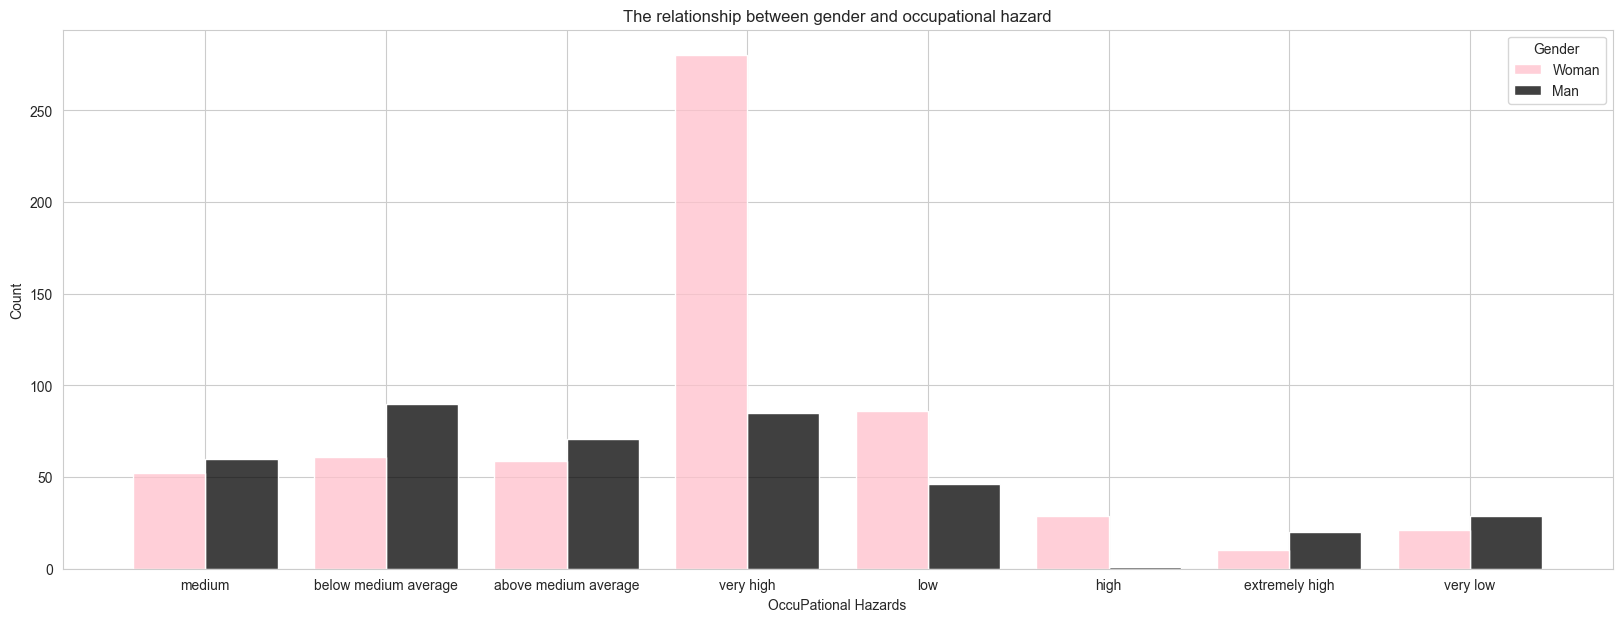

In [212]:
# 探究职业危害性与性别之间的关联
# 替换标签
_df['OccuPational Hazards'] = _df['OccuPational Hazards'].replace(
    [1,2,3,4,5,6,7,8],[labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]])
_df['Gender'] = _df['Gender'].replace(
    [1,2],['Woman','Man']
)

plt.subplots(figsize=(20,7))
sns.histplot(data=df,x=_df['OccuPational Hazards'],hue=_df['Gender'],multiple='dodge',shrink=.8,palette=['pink','black']).set(
    title = 'The relationship between gender and occupational hazard')

In [213]:
# 探究被动吸烟而患肺癌的情况
# 标签替换
_df['Passive Smoker'] = _df['Passive Smoker'].replace(
    [1,2,3,4,5,6,7,8],
    [labels[1],labels[2],labels[3],labels[4],labels[5],labels[6],labels[7],labels[8]]
)
# 计算
_df['Passive Smoker'].value_counts()

Passive Smoker
low                     284
very high               187
medium                  161
below medium average    140
extremely high          108
very low                 60
high                     30
above medium average     30
Name: count, dtype: int64

<Axes: title={'center': 'Number of Passive Smokers'}, xlabel='Passive Smoker', ylabel='Count'>

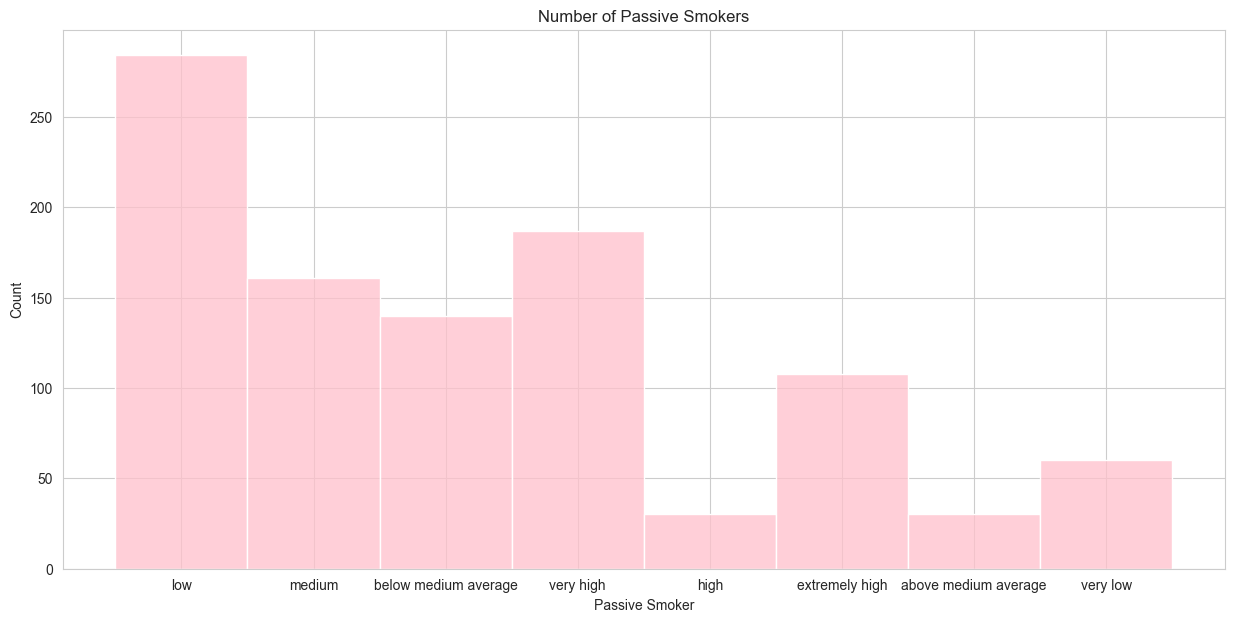

In [214]:
# 绘图
plt.subplots(figsize=(15,7))
plt.title("Number of Passive Smokers")
sns.histplot(data=_df, x=_df['Passive Smoker'],color='pink')

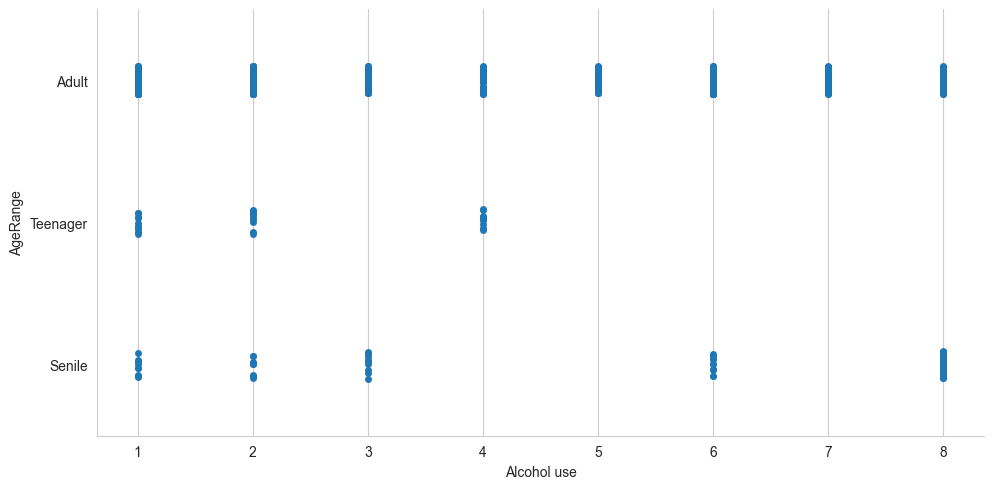

In [215]:
# 探究肺癌患者中 各年龄段的饮酒情况
# 数据集中的年龄14-73
# 划分年龄段
_df['AgeRange'] = None
# 青少年
_df.loc[(_df['Age'] >= 14) & (_df['Age'] < 18),'AgeRange'] = 'Teenager'
# 成年人
_df.loc[(_df['Age'] >= 18) & (_df['Age'] < 55),'AgeRange'] = 'Adult'
# 老年人
_df.loc[(_df['Age'] >= 55) & (_df['Age'] <= 73),'AgeRange'] = 'Senile'
sns.catplot(data=_df,x='Alcohol use',y='AgeRange',aspect=20/10,height=5)

<Axes: xlabel='OccuPational Hazards', ylabel='Genetic Risk'>

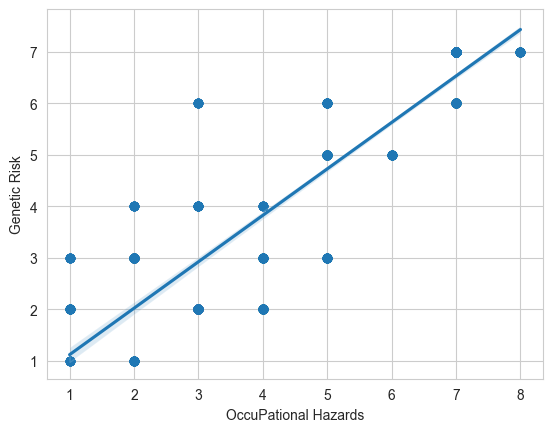

In [216]:
sns.regplot(x="OccuPational Hazards", y="Genetic Risk", data=df)

<Axes: xlabel='Air Pollution', ylabel='Coughing of Blood'>

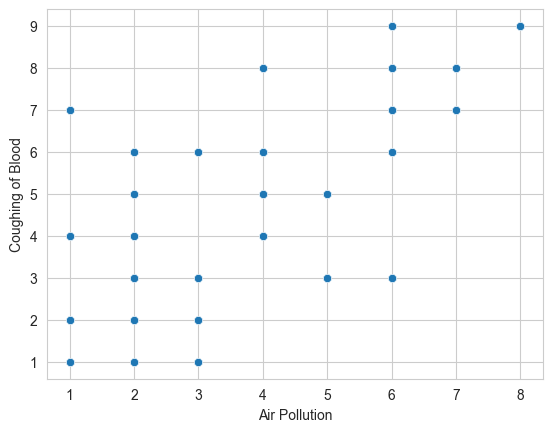

In [217]:
sns.scatterplot(data=df,x="Air Pollution", y="Coughing of Blood")

<Axes: xlabel='Obesity', ylabel='Coughing of Blood'>

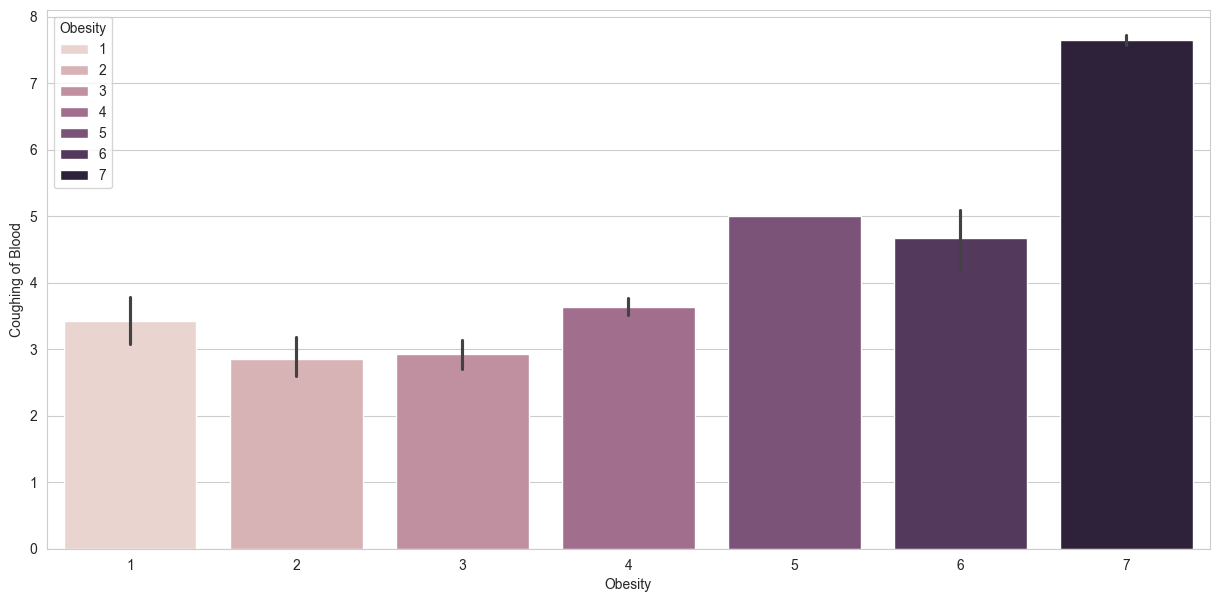

In [218]:
# 探究肥胖人群与咳血之间的关系
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Obesity',y='Coughing of Blood',hue='Obesity')

In [345]:
# 特征提取
# x = df.drop(columns=['Level'])
# y = df['Level']

In [346]:
# 数据集划分
# x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [347]:
# 标准化
# transfer = StandardScaler()
# x_train = transfer.fit_transform(x_train)
# x_test = transfer.transform(x_test)

In [348]:
# x_train

array([[ 0.06723077, -0.81649658, -0.89280468, ..., -0.29097139,
        -0.92236993, -0.63204242],
       [-0.93764195, -0.81649658, -0.89280468, ..., -0.83557024,
        -0.43654679,  0.73559187],
       [ 0.15097016, -0.81649658,  0.08676158, ...,  1.88742401,
         0.53509948,  2.10322616],
       ...,
       [-0.18398741,  1.22474487, -0.89280468, ...,  1.34282516,
         0.53509948,  2.7870433 ],
       [-0.77016316,  1.22474487, -1.38258782, ...,  1.88742401,
         1.50674576,  1.41940901],
       [ 0.65340652,  1.22474487, -1.38258782, ..., -0.83557024,
        -0.43654679, -1.31585956]])

# KNN

In [223]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [224]:
# 特征提取
x = df.drop(columns=['Level'])
y = df['Level']
# 数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)
# 标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

In [225]:
# 创建KNN分类器对象
knn = KNeighborsClassifier(n_neighbors=3)
# 使用训练集对KNN分类器进行训练
knn.fit(x_train, y_train)
# 使用测试集进行预测
y_pred = knn.predict(x_test)
# 计算并打印准确度
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy: {:.2f}%".format(accuracy * 100))

KNN Accuracy: 100.00%


In [226]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("KNN Accuracy: ", accuracy)
print("KNN Recall: ", recall)
print("KNN F1-score: ", f1)

KNN Accuracy:  1.0
KNN Recall:  1.0
KNN F1-score:  1.0


<Axes: >

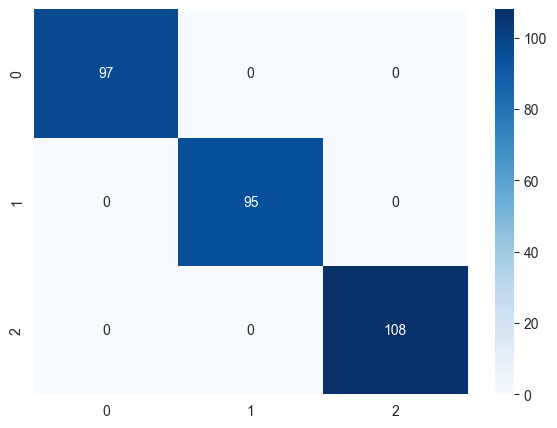

In [227]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')

In [228]:
# 调参
# 初始化列表来存储每个k值的准确度
k_values = list(range(1, 31))
accuracies = []
# 逐一测试k值
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k = {k},"+"Accuracy: {:.2f}%".format(accuracy * 100))

k = 1,Accuracy: 100.00%
k = 2,Accuracy: 100.00%
k = 3,Accuracy: 100.00%
k = 4,Accuracy: 100.00%
k = 5,Accuracy: 100.00%
k = 6,Accuracy: 100.00%
k = 7,Accuracy: 100.00%
k = 8,Accuracy: 100.00%
k = 9,Accuracy: 100.00%
k = 10,Accuracy: 100.00%
k = 11,Accuracy: 96.67%
k = 12,Accuracy: 98.33%
k = 13,Accuracy: 98.33%
k = 14,Accuracy: 96.67%
k = 15,Accuracy: 95.67%
k = 16,Accuracy: 96.00%
k = 17,Accuracy: 97.67%
k = 18,Accuracy: 96.33%
k = 19,Accuracy: 96.33%
k = 20,Accuracy: 96.33%
k = 21,Accuracy: 96.33%
k = 22,Accuracy: 96.33%
k = 23,Accuracy: 96.33%
k = 24,Accuracy: 96.67%
k = 25,Accuracy: 94.00%
k = 26,Accuracy: 94.00%
k = 27,Accuracy: 94.67%
k = 28,Accuracy: 94.67%
k = 29,Accuracy: 94.67%
k = 30,Accuracy: 94.67%


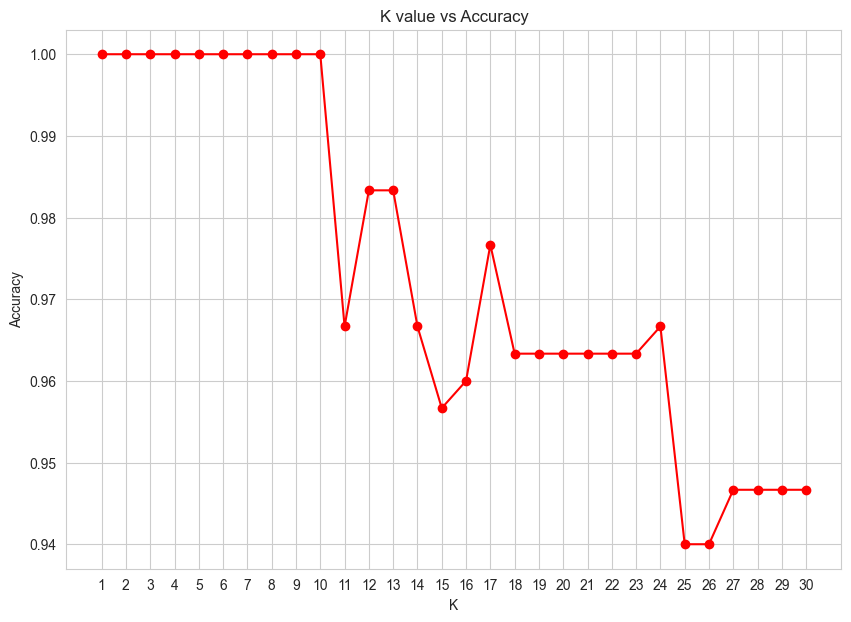

In [229]:
# 绘制k值与准确度的关系图
plt.figure(figsize=(10,7))
plt.plot(k_values, accuracies, marker='o', color='r')
plt.title('K value vs Accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# 决策树

In [230]:
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,2
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,2
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


In [231]:
# 特征提取
x = df.drop(columns=['Level'])
y = df['Level']
# 数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [232]:
# 初始化决策树分类器
clf = DecisionTreeClassifier(max_depth=5)
# 训练模型
clf.fit(x_train, y_train)
# 使用模型进行预测
y_pred = clf.predict(x_test)
# 计算准确率
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


In [233]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("DecisionTree Accuracy: ", accuracy)
print("DecisionTree Recall: ", recall)
print("DecisionTree F1-score: ", f1)

DecisionTree Accuracy:  1.0
DecisionTree Recall:  1.0
DecisionTree F1-score:  1.0


<Axes: >

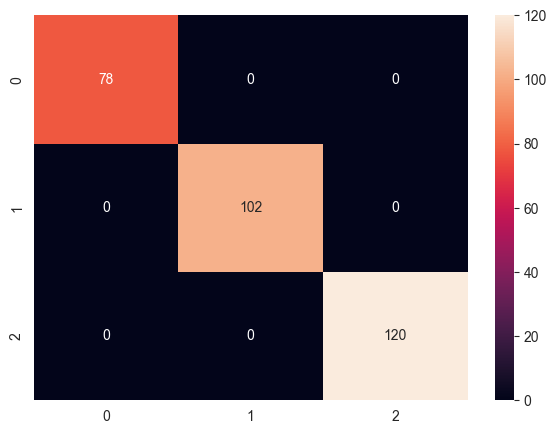

In [234]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

In [235]:
# 调参
# 初始化列表来存储每个depth值的准确度
depth = list(range(1, 24))
accuracies = []
# 在1到23的范围内遍历max_depth
for d in depth:
    clf = DecisionTreeClassifier(max_depth=d)
    accuracy = cross_val_score(clf, x_train, y_train, cv=5).mean()
    accuracies.append(accuracy)
    print(f"max_depth = {d},"+"Accuracy: {:.2f}%".format(accuracy * 100))

max_depth = 1,Accuracy: 61.57%
max_depth = 2,Accuracy: 82.57%
max_depth = 3,Accuracy: 89.71%
max_depth = 4,Accuracy: 99.57%
max_depth = 5,Accuracy: 100.00%
max_depth = 6,Accuracy: 100.00%
max_depth = 7,Accuracy: 100.00%
max_depth = 8,Accuracy: 100.00%
max_depth = 9,Accuracy: 100.00%
max_depth = 10,Accuracy: 100.00%
max_depth = 11,Accuracy: 100.00%
max_depth = 12,Accuracy: 100.00%
max_depth = 13,Accuracy: 100.00%
max_depth = 14,Accuracy: 100.00%
max_depth = 15,Accuracy: 100.00%
max_depth = 16,Accuracy: 100.00%
max_depth = 17,Accuracy: 100.00%
max_depth = 18,Accuracy: 100.00%
max_depth = 19,Accuracy: 100.00%
max_depth = 20,Accuracy: 100.00%
max_depth = 21,Accuracy: 100.00%
max_depth = 22,Accuracy: 100.00%
max_depth = 23,Accuracy: 100.00%


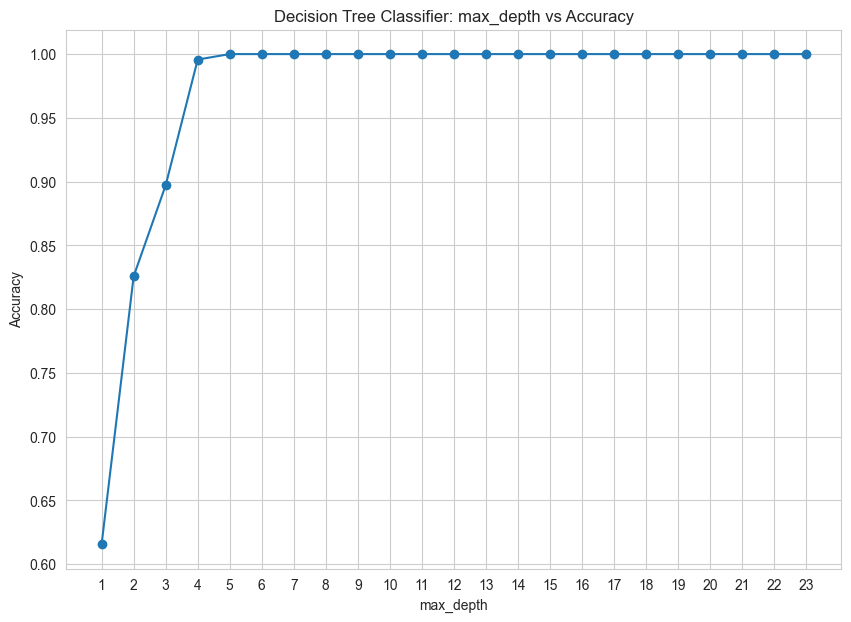

In [236]:
# 绘制depth与accuracies的关系图
plt.figure(figsize=(10, 7))
plt.plot(depth, accuracies, marker='o')
plt.title('Decision Tree Classifier: max_depth vs Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(depth)
plt.grid(True)
plt.show()

# 朴素贝叶斯

In [237]:
# 特征提取
x = df.drop(columns=['Level'])
y = df['Level']
# 数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [238]:
# 初始化朴素贝叶斯分类器
clf = GaussianNB()
# 训练模型
clf.fit(x_train, y_train)
# 预测
y_pred = clf.predict(x_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 89.00%


In [239]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("NaiveBayes Accuracy: ", round(accuracy, 4))
print("NaiveBayes Recall: ", round(recall, 4))
print("NaiveBayes F1-score: ", round(f1, 4))

NaiveBayes Accuracy:  0.89
NaiveBayes Recall:  0.8935
NaiveBayes F1-score:  0.8948


<Axes: >

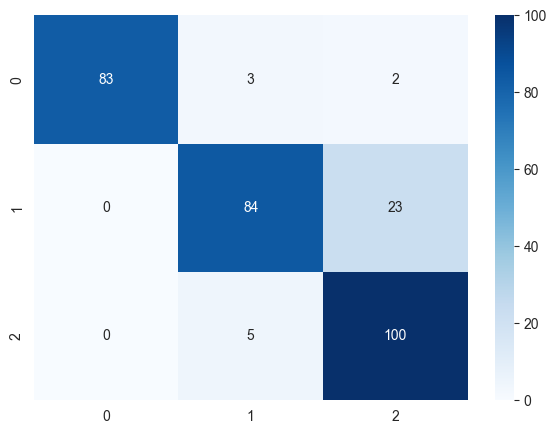

In [240]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='Blues',fmt='g')

In [343]:
# 特征提取
x = df.drop(columns=['Level','Weight Loss'])
y = df['Level']
# 数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [344]:
# 初始化朴素贝叶斯分类器
clf = GaussianNB()
# 训练模型
clf.fit(x_train, y_train)
# 预测
y_pred = clf.predict(x_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 88.33%


# 随机森林

In [243]:
# 特征提取
x = df.drop(columns=['Level'])
y = df['Level']
# 数据集划分
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7)

In [244]:
# 初始化随机森林分类器
clf = RandomForestClassifier(n_estimators=2, random_state=5)
# 训练模型
clf.fit(x_train, y_train)
# 预测
y_pred = clf.predict(x_test)
# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
# 混淆矩阵
cm = confusion_matrix(y_test, y_pred)
print(cm)
# 输出完整的分类结果
print(classification_report(y_test, y_pred))

Accuracy: 100.00%
[[ 89   0   0]
 [  0 103   0]
 [  0   0 108]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00       103
           2       1.00      1.00      1.00       108

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [245]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
print("RandomForest Accuracy: ", accuracy)
print("RandomForest Recall: ", recall)
print("RandomForest F1-score: ", f1)

RandomForest Accuracy:  1.0
RandomForest Recall:  1.0
RandomForest F1-score:  1.0


<Axes: >

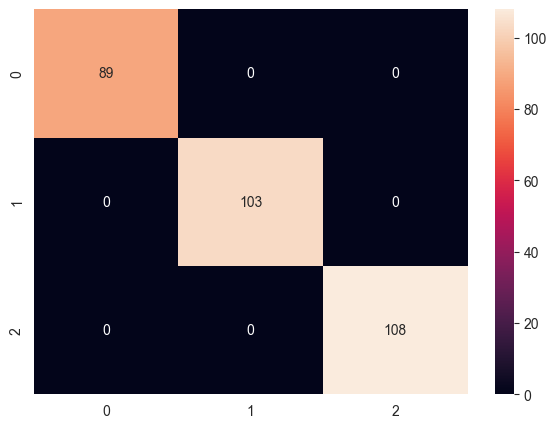

In [246]:
# 绘制真实值与预测值之间的关系
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='g')

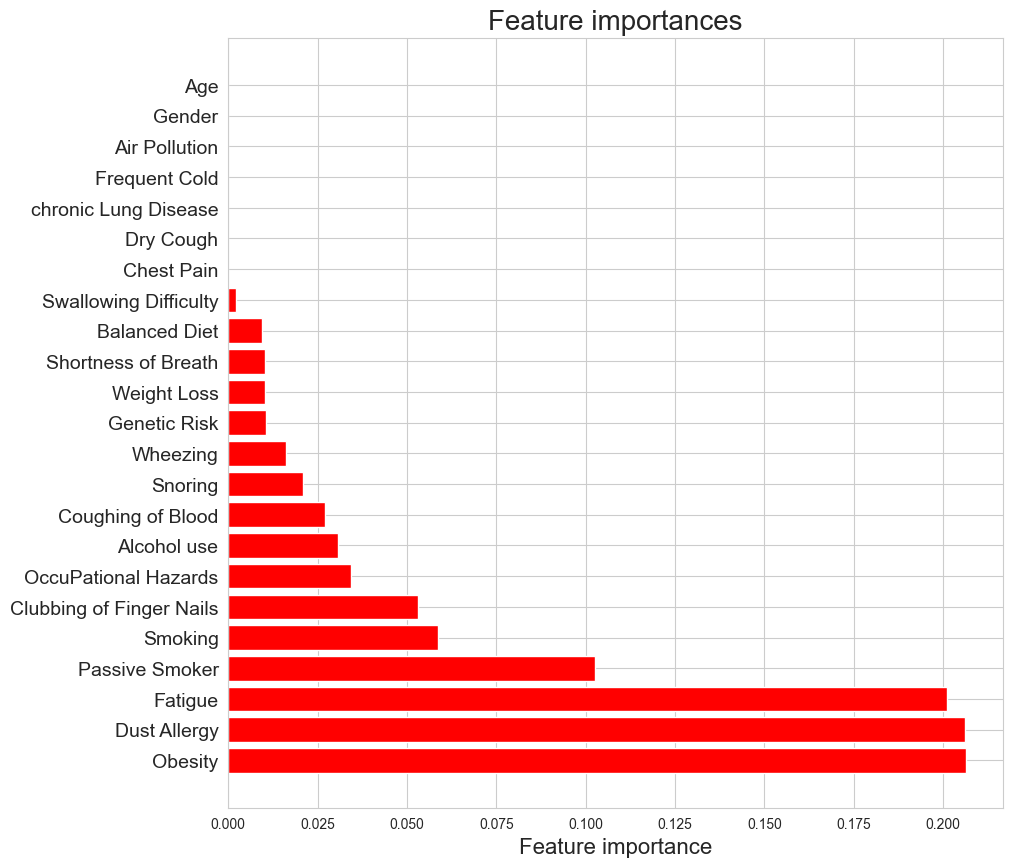

In [247]:
# 提取特征重要性
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
# 绘制特征重要性图
plt.figure(figsize=(10, 10))
plt.title("Feature importances", fontsize=20)
plt.barh(list(range(x.shape[1])), importances[indices], color="r", align="center")
names = x.columns[indices]
plt.yticks(list(range(x.shape[1])), names, rotation=0, fontsize=14)
plt.xlabel('Feature importance', fontsize=16)
plt.show()

In [248]:
# 调参
def traversal(feature, label):
    from sklearn.model_selection import GridSearchCV as gs
    params = {
        'n_estimators': range(10, 101, 10),
        'criterion': ['gini', 'entropy'],
        'min_samples_split': range(2, 5, 1),
        'min_samples_leaf': range(1, 3, 1),
        'max_features': ['auto', 'log2']
    }
    gridsearch = gs(estimator=RandomForestClassifier(), param_grid=params, scoring='f1_weighted', cv=4)
    gridsearch.fit(feature, label)
    print('\nBest params:', gridsearch.best_params_)
    print('\nBest score:',gridsearch.best_score_)

In [249]:
traversal(x_train, y_train)


Best params: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Best score: 1.0


C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_par


Best params: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Best score: 1.0


C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\17531\Desktop\CancerPredict\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_par

# 神经网络

In [320]:
# 特征提取
x = df.drop(columns=['Level'])
y = df['Level']
# 将目标值转换为百分比矩阵
_y = to_categorical(y)
_y.shape

(1000, 3)

In [321]:
# 数据集划分
x_train, x_test, y_train, y_test = train_test_split(x,_y,train_size=0.7)

In [322]:
y_test

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1

In [323]:
# 标准化处理
transfer = StandardScaler().fit(x_train)
x_train = transfer.transform(x_train)
x_test = transfer.transform(x_test)

In [324]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [325]:
# 创建一个神经网络模型 ---> 四层神经元(三层密集，一层下降)
model = keras.Sequential([
    # relu: 整流线性单元
    keras.layers.Dense(units = 64, activation='relu'),
    keras.layers.Dense(units = 128, activation='relu'),
    # 随机杀死0.7的神经元，防止过拟合
    keras.layers.Dropout(0.7),
    keras.layers.Dense(3, activation='softmax'),
])

In [326]:
model.compile(
    optimizer='adam', # 优化器
    loss='categorical_crossentropy', # 损失函数
    metrics=['accuracy'], # 评估标准
)

In [327]:
history = model.fit(x_train,y_train,epochs=13, validation_split=0.3)

Epoch 1/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.4589 - loss: 1.0838 - val_accuracy: 0.8341 - val_loss: 0.5924
Epoch 2/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7565 - loss: 0.6371 - val_accuracy: 0.9147 - val_loss: 0.3889
Epoch 3/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8783 - loss: 0.4064 - val_accuracy: 0.9668 - val_loss: 0.2745
Epoch 4/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8529 - loss: 0.3715 - val_accuracy: 0.9810 - val_loss: 0.1998
Epoch 5/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9101 - loss: 0.2507 - val_accuracy: 0.9810 - val_loss: 0.1450
Epoch 6/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9630 - loss: 0.1861 - val_accuracy: 0.9810 - val_loss: 0.1077
Epoch 7/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9548 - loss: 0.1525 - val_accuracy: 0.9810 - val_loss: 0.0828
Epoch 8/13
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9558 - loss: 0.1626 - val_accuracy: 0.9858 - val_loss

In [328]:
# 打印模型摘要
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,731 (120.05 KB)

 Trainable params: 10,243 (40.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,488 (80.04 KB)

In [329]:
predict = model.predict(x_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [330]:
classes = np.argmax(predict, axis=1)
y_true = np.argmax(y_test, axis=1)
print(f"准确率:{round(accuracy_score(y_true, classes)*100, 2)}%")

准确率:99.67%


In [331]:
accuracy = accuracy_score(y_true, classes)
recall = recall_score(y_true, classes, average='macro')
f1 = f1_score(y_true, classes, average='macro')
print("ANN Accuracy: ", round(accuracy, 4))
print("ANN Recall: ", round(recall, 4))
print("ANN F1-score: ", round(f1, 4))

ANN Accuracy:  0.9967
ANN Recall:  0.997
ANN F1-score:  0.9967


In [332]:
classes

array([1, 1, 1, 1, 0, 2, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2,
       1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 2,
       0, 0, 2, 2, 0, 0, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 1, 1, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1,
       0, 2, 1, 0, 0, 0, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 1,
       0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 0, 0,
       0, 2, 1, 0, 2, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 2,
       0, 0, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 1,
       1, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       0, 2, 0, 2, 2, 2, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1], d

<Axes: >

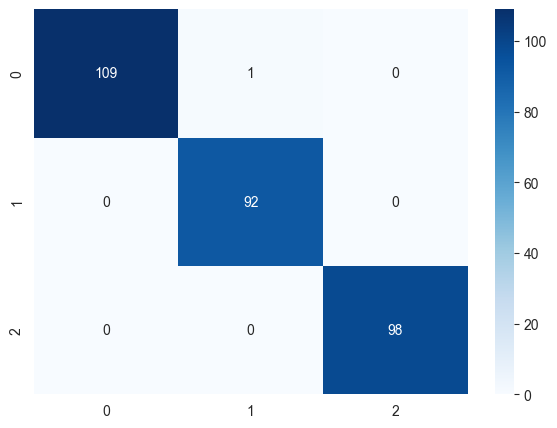

In [333]:
# 绘制真实值与预测值的热力图
plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_true,classes),annot=True,cmap='Blues',fmt='g')

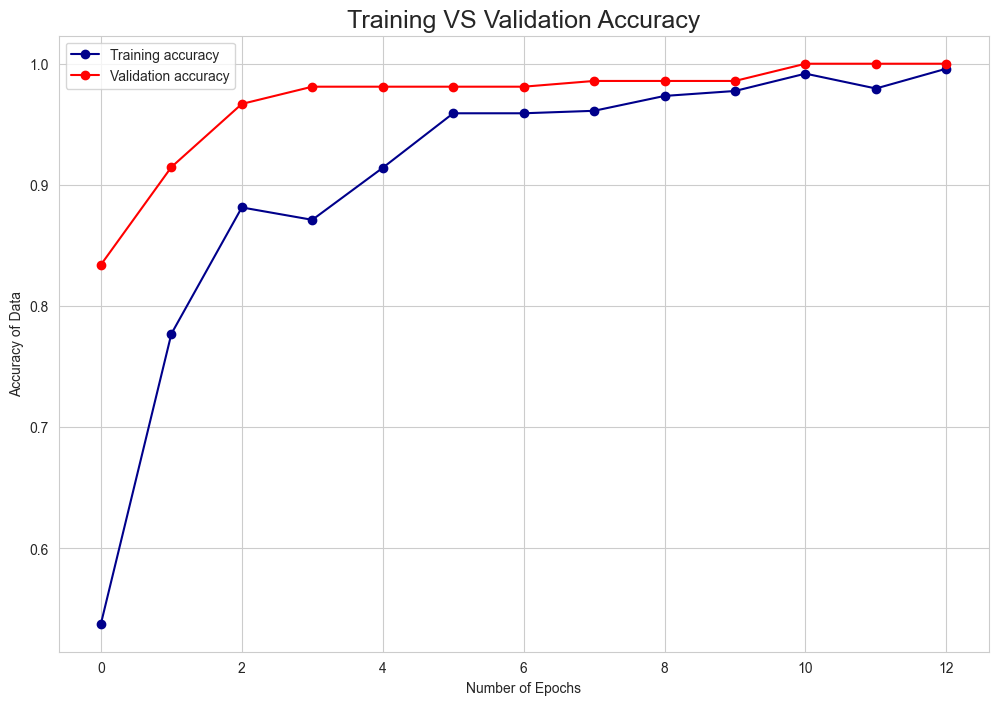

In [334]:
# 验证准确性与迭代次数之间的关系
plt.figure(figsize=(12,8))
# 迭代次数
plt.xlabel('Number of Epochs')
# 准确性
plt.ylabel('Accuracy of Data')
plt.plot(history.history['accuracy'],label='Training accuracy', marker='o',color='darkblue')
plt.plot(history.history['val_accuracy'],label ='Validation accuracy',marker='o',color='r')
plt.title("Training VS Validation Accuracy", fontsize = 18)
plt.legend()

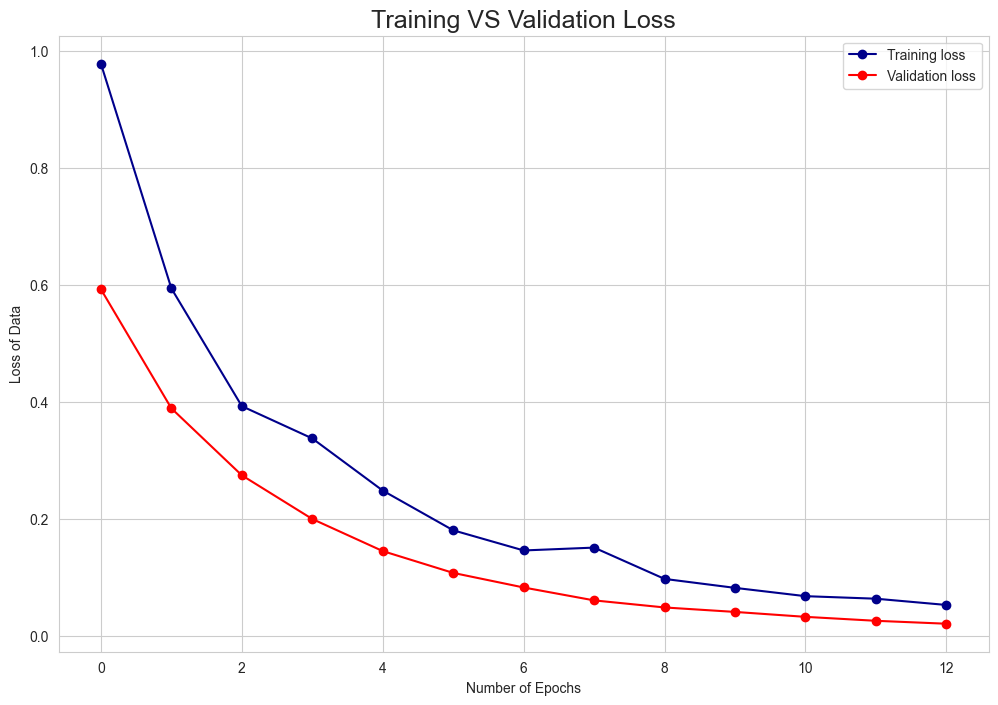

In [335]:
# 验证损失度与迭代次数之间的关系
plt.figure(figsize=(12,8))
# 迭代次数
plt.xlabel('Number of Epochs')
# 损失度
plt.ylabel('Loss of Data')
plt.plot(history.history['loss'],label='Training loss', marker='o',color='darkblue')
plt.plot(history.history['val_loss'],label ='Validation loss',marker='o',color='r')
plt.title("Training VS Validation Loss", fontsize = 18)
plt.legend()

| 模型           |   准确率   |       召回率        |       F1值       |
| :------------: |:-------:|:----------------:|:---------------:|
| KNN            |   1.0   |       1.0        |       1.0       |
| DecisionTree   |   1.0   |       1.0        |       1.0       |
| NaiveBayes     |  0.89   |      0.8935      |     0.8948      |
| RandomForest   | 1.0     |       1.0        |       1.0       |
| ANN            | 0.9967  |      0.997       |     0.9967      |